# Diabets
A descriptive and predictive analysis 

# Imoprting the csv file 

In [10]:
import numpy as np 
import pandas as pd # (e.g. pd.read_csv)
# Visualization Seaborn & Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


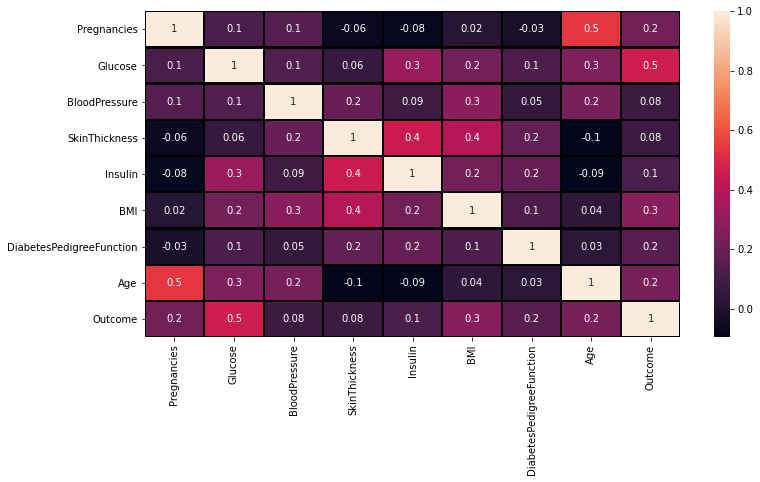

In [12]:
plt.figure(figsize = (12,6)) 
sns.heatmap(df.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor = 'black', annot=True,);

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [14]:
#we count the number of records for each target class, through the value_counts(). As we can see he dataset is imbalanced.
df['Outcome'].value_counts()
#sns.countplot(df.Outcome);

0    1316
1     684
Name: Outcome, dtype: int64

In [19]:
# Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import numpy as np

In [23]:
fig = px.scatter(df, x='Glucose', y='Insulin')
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Glucose and Insulin')
fig.show()

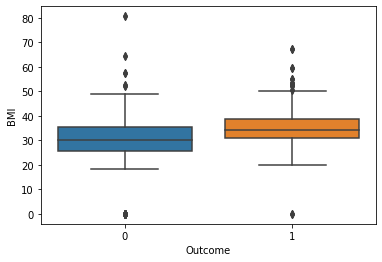

In [24]:
plot = sns.boxplot(x='Outcome',y="BMI",data=df)

# Prediction

In [26]:
dist = df['Outcome'].value_counts()
colors = ['mediumturquoise', 'darkorange']
trace = go.Pie(values=(np.array(dist)),labels=dist.index)
layout = go.Layout(title='Diabets Outcome')
data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

# 1. Over-sampling (Up Sampling)
When the quantity of data is insufficient, the oversampling method tries to balance by incrementing the size of rare samples.
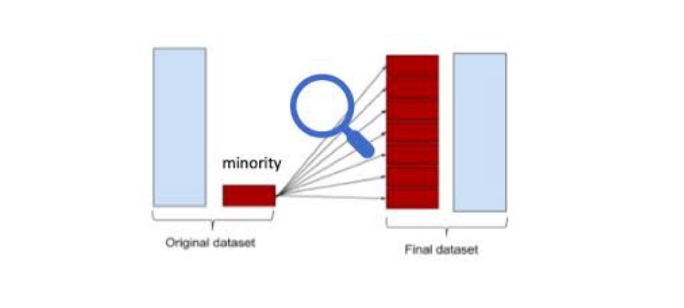

In [ ]:
# pip install imbalanced-learn
# conda install -c glemaitre imbalanced-learn

In [34]:
x = df.drop(["Outcome"],axis = 1) #independent value
y = df.Outcome

In [35]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [38]:
#y.value_counts()
dist = y.value_counts()
colors = ['mediumturquoise', 'darkorange']
trace = go.Pie(values=(np.array(dist)),labels=dist.index)
layout = go.Layout(title='Diabets Outcome')
data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

## Normalization

In [40]:
x = (x-np.min(x))/(np.max(x)-np.min(x)).values

In [41]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.693467,0.508197,0.318182,0.000000,0.416873,0.020922,0.433333
1,0.000000,0.422111,0.672131,0.281818,0.168011,0.473945,0.066183,0.033333
2,0.000000,0.728643,0.000000,0.000000,0.000000,0.548387,0.235696,0.166667
3,0.000000,0.678392,0.557377,0.381818,0.336022,0.524814,0.122545,0.050000
4,0.058824,0.698492,0.508197,0.372727,0.645161,0.504963,0.195559,0.000000


In [42]:
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
r_for = RandomForestClassifier().fit(x_train,y_train)

In [44]:
y_pred = r_for.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix

In [46]:
rf_score = accuracy_score(y_test,y_pred)
rf_score

0.9791271347248577